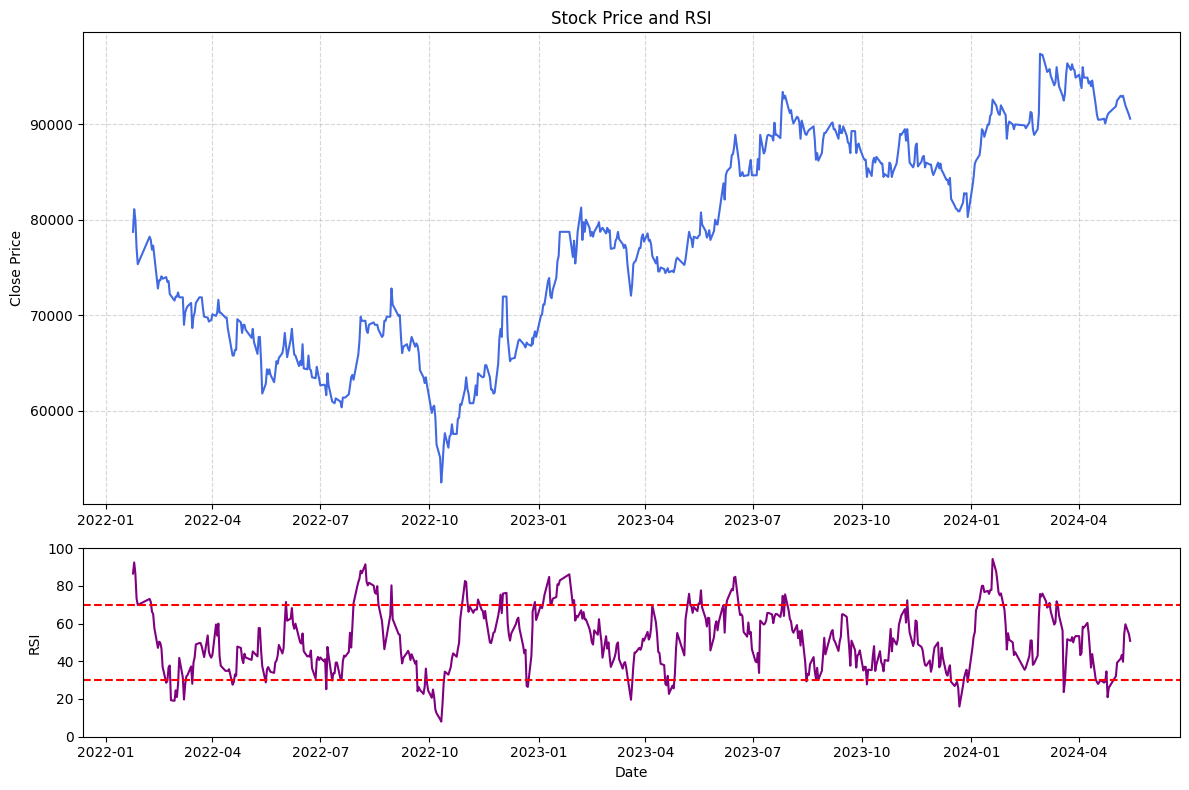

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mplfinance as mpf
from plotly.subplots import make_subplots
import plotly.graph_objects as go

file_path = './Dataset/VCB.csv'

df = pd.read_csv(file_path)

df['time'] = pd.to_datetime(df['time'], format='%m/%d/%Y')
df.set_index('time', inplace=True)

df = df.loc['2022-01-01':'2024-12-31']

# Calculate daily price changes
df['Delta'] = df['close'].diff()
df = df.dropna()

# Define the lookback period for RSI calculation
window_length = 14

# Calculate gains and losses
df['Gain'] = np.where(df['Delta'] > 0, df['Delta'], 0)
df['Loss'] = np.where(df['Delta'] < 0, abs(df['Delta']), 0)

# Calculate average gain and average loss
df['Average Gain'] = df['Gain'].rolling(window=window_length).mean()
df['Average Loss'] = df['Loss'].rolling(window=window_length).mean()
df = df.dropna()

# relative strength (RS)
df['RS'] = df['Average Gain'] / df['Average Loss']

df['RSI'] = 100 - (100 / (1 + df['RS']))

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), gridspec_kw={'height_ratios': [2.5,1]})

# Plot close price
ax1.plot(df.index, df['close'], label='Close Price', color='royalblue')
ax1.set_ylabel('Close Price')
ax1.set_title('Stock Price and RSI')
ax1.grid(visible=True, alpha=0.5, linestyle='--')

# Plot RSI
ax2.plot(df.index, df['RSI'], label='RSI', color='Purple')
ax2.axhline(y=70, color='red', linestyle='--')  # Overbought threshold
ax2.axhline(y=30, color='red', linestyle='--')  # Oversold threshold
ax2.set_ylim([0 , 100])
ax2.set_ylabel('RSI')
ax2.set_xlabel('Date')

# Show plot
plt.tight_layout()
plt.show()

# Create Figure
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, row_heights=[0.7, 0.3],
                    vertical_spacing=0.15,  # Adjust vertical spacing between subplots
                    subplot_titles=("Candlestick Chart", "RSI"))  # Add subplot titles

# Subplot 1: Plot candlestick chart
fig.add_trace(go.Candlestick(
    x=df.index,
    open=df['open'],
    high=df['high'],
    low=df['low'],
    close=df['close'],
    increasing_line_color='#00cc96',  # Green for increasing
    decreasing_line_color='#ff3e3e',  # Red for decreasing
    showlegend=False
), row=1, col=1)  # Specify row and column indices
fig.update_yaxes(fixedrange=False, row=1, col=1)

# Subplot 2: Plot RSI
fig.add_trace(go.Scatter(
    x=df.index,
    y=df['RSI'],
    mode='lines',  # No markers for RSI
    line=dict(color='blue', width=2),  # Adjust line color and width
    showlegend=False,
), row=2, col=1)

# Add upper/lower bounds
fig.update_yaxes(range=[-10, 110], row=2, col=1, fixedrange=True)
fig.add_hline(y=0, col=1, row=2, line_color="black", line_width=1.5)
fig.add_hline(y=100, col=1, row=2, line_color="black", line_width=1.5)

# Add overbought/oversold
fig.add_hline(y=30, col=1, row=2, line_color='#FF0000', line_width=1, line_dash='dash')
fig.add_hline(y=70, col=1, row=2, line_color='#FF0000', line_width=1, line_dash='dash')

# Update layout with zoom and pan tools enabled
layout = go.Layout(
    title='Candlestick Chart and RSI Subplots',
    title_font=dict(size=20),  # Adjust title font size
    plot_bgcolor='#f2f2f2',  # Light gray background
    yaxis=dict(title='Price', showgrid=True, gridcolor='#cccccc', tickfont=dict(size=12)),
    yaxis2=dict(title='RSI', showgrid=True, gridcolor='#cccccc', tickfont=dict(size=12)),
    height=800,
    width=1200,
    xaxis_rangeslider=dict(visible=True, thickness=0.03),
    xaxis=dict(type='category')
)

# Update the layout of the entire figure
fig.update_layout(layout)
fig.show()
